## Jupyter Notebook for PlantCLEF 2025 Competition

Author: Jacob A Rose

Date: Mon Apr 14th, 2025

Highlights:
- Downloads the metadata for the PlantCLEF 2025 dataset using Kaggle API.
- Defines utility functions for processing dataset file paths.
- Prepares inputs for training and validation using class mappings.

Note: Ensure Kaggle API is configured and accessible before running the notebook.

In [1]:
# !uv pip install kaggle
# %%bash

# data_dir=${HOME}/plantclef-vision/data/plantclef2025/competition-metadata
# mkdir -p $data_dir
# kaggle competitions download -c plantclef-2025 -p $data_dir
# unzip -q -o $data_dir/plantclef-2025.zip -d $data_dir
# rsync -ah --progress "plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800" "plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"
# !find PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/* -maxdepth 0 -type d | wc -l
# !git config --global user.name "Jacob A Rose"
# !git config --global user.email jacobrose.codes@gmail.com

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

analysis_dir = os.path.expanduser("~/plantclef-vision/results/analysis")
# os.makedirs(analysis_dir, exist_ok=True)
print(analysis_dir)
short_cols = [
    "organ",
    "species_id",
    "obs_id",
    "license",
    "author",
    "altitude",
    "latitude",
    "longitude",
    "gbif_species_id",
    "species",
    "genus",
    "family",
    "dataset",
    "publisher",
    "learn_tag",
]

/teamspace/studios/this_studio/plantclef-vision/results/analysis


### 1. Read the training metadata csv into a dataframe

In [4]:
import pandas as pd

train_metadata_path = "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/competition-metadata/PlantCLEF2024_single_plant_training_metadata.csv"


train_metadata = pd.read_csv(train_metadata_path, sep=";", low_memory=False)
train_metadata.head()
# train_metadata.info()

,image_name,organ,species_id,obs_id,license,partner,author,altitude,latitude,longitude,gbif_species_id,species,genus,family,dataset,publisher,references,url,learn_tag,image_backup_url
0,59feabe1c98f06e7f819f73c8246bd8f1a89556b.jpg,leaf,1396710,1008726402,cc-by-sa,NaN,Gulyás Bálint,205.9261,47.592160,19.362895,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/59feabe1c98f06...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
1,dc273995a89827437d447f29a52ccac86f65476e.jpg,leaf,1396710,1008724195,cc-by-sa,NaN,vadim sigaud,323.7520,47.906703,7.201746,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/dc273995a89827...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
2,416235e7023a4bd1513edf036b6097efc693a304.jpg,leaf,1396710,1008721908,cc-by-sa,NaN,fil escande,101.3160,48.826774,2.352774,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/416235e7023a4b...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
3,cbd18fade82c46a5c725f1f3d982174895158afc.jpg,leaf,1396710,1008699177,cc-by-sa,NaN,Desiree Verver,5.1070,52.190427,6.009677,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/cbd18fade82c46...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
4,f82c8c6d570287ebed8407cefcfcb2a51eaaf56e.jpg,leaf,1396710,1008683100,cc-by-sa,NaN,branebrane,165.3390,45.794739,15.965862,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/f82c8c6d570287...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...


### 2. Crawl the image root directory for all images contained in class subdirectories

In [5]:
import os
from tqdm import tqdm
from pprint import pprint


dataset_dir = "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"

image_paths = [
    os.path.join(root, filename)
    for root, _, filenames in tqdm(os.walk(dataset_dir), smoothing=0)
    for filename in filenames
]

print(len(image_paths))
pprint(image_paths[:5])

7807it [01:17, 100.76it/s]

1408033
['/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1355868/0070793945bc6db2c597387006c5425751204baa.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1355868/009fa47428093ac9f2d7df162ed1da82300797f2.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1355868/00af911161109b7ce1b5f89fbc7a50668d98eb89.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1355868/00ee391ea705c86eaf954acbf08567504e4f347e.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1355868/00f5a6720aaeeaeb29818b5442b80a7714041df8.jpg

### 3. Merge list of local image file paths with rest of the metadata

In [6]:
paths_df = pd.DataFrame({"image_path": image_paths})
paths_df = paths_df.assign(
    image_name=paths_df.image_path.str.split("/", expand=True).iloc[:, -1]
)


train_metadata = train_metadata.merge(paths_df, how="left", on="image_name")
train_metadata.info()

0          0070793945bc6db2c597387006c5425751204baa.jpg
1          009fa47428093ac9f2d7df162ed1da82300797f2.jpg
2          00af911161109b7ce1b5f89fbc7a50668d98eb89.jpg
3          00ee391ea705c86eaf954acbf08567504e4f347e.jpg
4          00f5a6720aaeeaeb29818b5442b80a7714041df8.jpg
                               ...                     
1408028    54775c7db01488e6ea2ea1811262b2469619b090.jpg
1408029    5ad3097dfbcf48140db5e1fd53499de414a32fcd.jpg
1408030    728c22c9fd52d2b98bd22fae77329e6255ac76cb.jpg
1408031    d30eac569700c8f4d149bc91671d535d79493da0.jpg
1408032    2cc1c637d0db418c5ad62991b8806c64f1e41533.jpg
Name: 10, Length: 1408033, dtype: object

In [ ]:
from plantclef.model_setup import setup_fine_tuned_model
from plantclef.config import get_device
from pprint import pprint
import timm


model_path: str = setup_fine_tuned_model()
model_name: str = "vit_base_patch14_reg4_dinov2.lvd142m"
top_k: int = 10
model_device = get_device()
num_classes = 7806  # total plant species
top_k = top_k


model = timm.create_model(
    model_name,
    pretrained=False,
    num_classes=num_classes,
    checkpoint_path=model_path,
)

data_config = timm.data.resolve_model_data_config(model)
transform = timm.data.create_transform(**data_config, is_training=False)


pprint(data_config)

# {'crop_mode': 'center',
#  'crop_pct': 1.0,
#  'input_size': (3, 518, 518),
#  'interpolation': 'bicubic',
#  'mean': (0.485, 0.456, 0.406),
#  'std': (0.229, 0.224, 0.225)}

In [11]:
# from PIL import Image

# def smart_resize(image: Image.Image, target_height: int, target_width: int) -> Image.Image:
#     """
#     Resizes an image to the target dimensions while maintaining aspect ratio.
#     Pads the image with black (zero) pixels to fit the target dimensions if necessary.

#     :param image: Input PIL.Image object
#     :param target_height: Target height of the resized image
#     :param target_width: Target width of the resized image
#     :return: Resized and padded PIL.Image object
#     """
#     # Get original dimensions
#     original_width, original_height = image.size

#     # Calculate the scaling factor to maintain aspect ratio
#     scale = min(target_width / original_width, target_height / original_height)
#     new_width = int(original_width * scale)
#     new_height = int(original_height * scale)

#     # Resize the image while maintaining aspect ratio
#     resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

#     # Create a new black (zero) image with the target dimensions
#     new_image = Image.new("RGB", (target_width, target_height), (0, 0, 0))

#     # Calculate the position to center the resized image
#     top_left_x = (target_width - new_width) // 2
#     top_left_y = (target_height - new_height) // 2

#     # Paste the resized image onto the black canvas
#     new_image.paste(resized_image, (top_left_x, top_left_y))

#     return new_image

In [ ]:
# from multiprocessing import Pool
# from typing import List, Tuple
# from PIL import Image
# from tqdm import tqdm

# def parse_image(file_path: str, target_height: int, target_width: int) -> Tuple[str, Image.Image]:
#     """
#     Resizes an image using smart_resize and returns the resized image in memory.

#     :param file_path: Path to the input image file
#     :param target_height: Target height for resizing
#     :param target_width: Target width for resizing
#     :return: A tuple containing the file path and the resized PIL.Image object
#     """
#     try:
#         # Open the image
#         image = Image.open(file_path)

#         # Apply smart_resize
#         resized_image = smart_resize(image, target_height, target_width)

#         return file_path, resized_image
#     except Exception as e:
#         print(f"Error processing {file_path}: {e}")
#         return file_path, None

# from plantclef.datasets.image import parse_image, resize_images_in_parallel

# def resize_images_in_parallel(
#     file_paths: List[str],
#     target_height: int,
#     target_width: int,
#     num_workers: int = 4
# ) -> List[Tuple[str, Image.Image]]:
#     """
#     Maps the smart_resize function to a list of image file paths in parallel using multiprocessing.Pool.imap.

#     :param file_paths: List of image file paths
#     :param target_height: Target height for resizing
#     :param target_width: Target width for resizing
#     :param num_workers: Number of worker processes to use for parallel processing
#     :return: A list of tuples containing file paths and resized PIL.Image objects
#     """
#     resized_images = []
#     with Pool(processes=num_workers) as pool:
#         # Use tqdm to display a progress bar
#         for result in tqdm(
#             pool.imap(
#                 lambda file_path: parse_image(file_path, target_height, target_width),
#                 file_paths
#             ),
#             total=len(file_paths),
#             desc="Resizing images",
#             unit="image"
#         ):
#             resized_images.append(result)
#     return resized_images

## Calculate image aspect ratios to inform preprocessing decisions

## Resize images in parallel to 612x612

In [26]:
from plantclef.datasets.image import resize_images_in_parallel
from random import sample

target_size = (612, 612)
file_paths = sample(image_paths, 9)


paths, resized_images = resize_images_in_parallel(
    file_paths=file_paths,
    target_height=target_size[0],
    target_width=target_size[1],
    mode="lanczos",
    num_workers=4,
)

Resizing images: 100%|██████████| 9/9 [00:00<00:00, 15.25image/s]


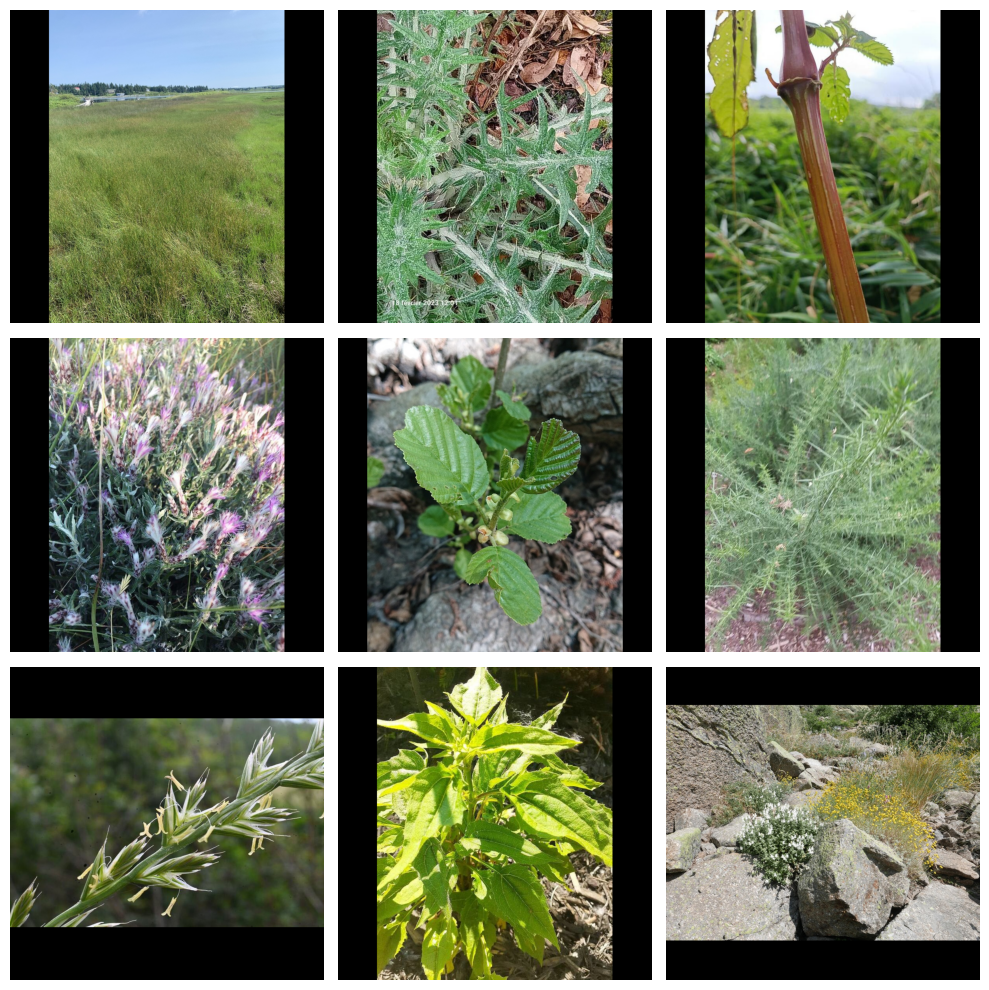

In [28]:
from plantclef.plotting import crop_image_square  # plot_image_grid

# plot_image_grid(image_paths, grid_size=(3, 3), figsize=(10, 10)
import matplotlib.pyplot as plt

grid_size = (3, 3)
figsize = (10, 10)
crop_square = True


img_data = resized_images

rows, cols = grid_size
fig, axes = plt.subplots(rows, cols, figsize=figsize)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(img_data):
        img = img_data[i]
        # crop image to square if required
        if crop_square:
            img = crop_image_square(img)

        ax.imshow(img)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [2]:
# from PIL import Image
# import matplotlib.pyplot as plt


# def plot_image_grid(image_paths, grid_size=(3, 3), figsize=(10, 10)):
#     """
#     Plots a grid of images from a list of file paths.

#     Args:
#         image_paths (list): List of image file paths.
#         grid_size (tuple): Tuple specifying the grid size (rows, cols).
#         figsize (tuple): Tuple specifying the figure size.
#     """
#     rows, cols = grid_size
#     fig, axes = plt.subplots(rows, cols, figsize=figsize)
#     axes = axes.flatten()

#     for i, ax in enumerate(axes):
#         if i < len(image_paths):
#             img = Image.open(image_paths[i])
#             ax.imshow(img)
#             ax.axis("off")
#         else:
#             ax.axis("off")

#     plt.tight_layout()
#     plt.show()

In [5]:
# print(f"{len([i for i in image_paths if i.endswith('.jpg')])}")
# print(f"{len(image_paths)}")


# plot_image_grid(image_paths[:10], grid_size=(3, 3), figsize=(10, 10))


# def get_class_from_filepath(filepath: str, classes) -> int:
#     class_name = filepath.split("/")[-2]
#     return classes[class_name]


# def get_inputs(input_dir: str) -> Any:
#     classes = load_imagenet_class_index()
#     filepaths = np.random.permutation(
#         [
#             os.path.join(root, filename)
#             for root, _, filenames in tqdm(walk(input_dir), smoothing=0)
#             for filename in filenames
#         ]
#     )
#     if "train" in input_dir:
#         return [
#             (filepath, get_class_from_filepath(filepath, classes))
#             for filepath in filepaths
#         ]

#     class_names = load_imagenet_val_class_names()
#     return [
#         (filepath, class_names_to_index_map[class_name])
#         for filepath, class_name in zip(filepaths, class_names)
#     ]

1408033
1408033


In [ ]:
# %%time

# from ydata_profiling import ProfileReport

# df = train_metadata.sample(frac=0.1)
# df = df[short_cols]
# profile = ProfileReport(df, title="PlantCLEF2024 Metadata Report", minimal=True)
# # profile.to_file(f"{analysis_dir}/plantclef2024_metadata_report.html")


# # profile = ProfileReport(train_metadata, title="PlantCLEF2024 Metadata Report", explorative=True)
# profile.to_file(f"{analysis_dir}/plantclef2024_metadata_report.html")
